In [1]:
import sys
sys.path

['/share/home/jvmt/CSST/SNPP/chili/1.11alpha/code',
 '/share/home/jvmt/anaconda3_7/lib/python37.zip',
 '/share/home/jvmt/anaconda3_7/lib/python3.7',
 '/share/home/jvmt/anaconda3_7/lib/python3.7/lib-dynload',
 '',
 '/share/home/jvmt/anaconda3_7/lib/python3.7/site-packages',
 '/share/home/jvmt/anaconda3_7/lib/python3.7/site-packages/IPython/extensions',
 '/share/home/jvmt/.ipython']

In [1]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib
import pandas as pd
from scipy import interpolate
from sympy import *
import os
import io
from scipy.integrate import simps
#import read_filter
#import inwf
#import inmg
from snpp import *

The END!


In [48]:
sss_22=fits.open('../results/snresult_5.5_red.fits')

In [31]:
sss_22.info()

Filename: ../results/snresult_2.5_red.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 ImageHDU         8   (8, 4, 6)   float64   


In [5]:
sss_22[1].data[0][1][7]

20.690326752216293

In [6]:
sss_22[1].data[3][2]

array([18.96571151, 19.65619966, 19.96270964, 20.36846022, 20.60164498,
       20.76561421, 20.9949789 , 21.15666825])

In [7]:
def pt(i,x,y1,y2,y3,y4):
    axes[i].plot([0,40],[17,17],'--',alpha=0.5,color='dimgray')
    axes[i].plot([0,40],[18,18],'--',alpha=0.5,color='dimgray')
    axes[i].plot([0,40],[19,19],'--',alpha=0.5,color='dimgray')
    axes[i].plot([0,40],[20,20],'--',alpha=0.5,color='dimgray')
    axes[i].plot([0,40],[21,21],'--',alpha=0.5,color='dimgray')
    axes[i].plot([0,40],[22,22],'--',alpha=0.5,color='dimgray')
    axes[i].scatter(x,y1,marker='D',color='b')
    axes[i].scatter(x,y2,marker='D',color='orange')
    axes[i].scatter(x,y3,marker='D',color='g')
    axes[i].scatter(x,y4,marker='D',color='r')
    axes[i].plot(x,y1,color='b')
    axes[i].plot(x,y2,color='orange')
    axes[i].plot(x,y3,color='g')
    axes[i].plot(x,y4,color='r')
    axes[i].set_ylim(14,24)
    axes[i].set_xlim(0,45)
    axes[i].set_xlabel('repeat time',fontsize=13)
    #axes[i].set_ylabel('$\mu_{g}$ '+' (mag/$arcsec^{2}$)',fontsize=18)

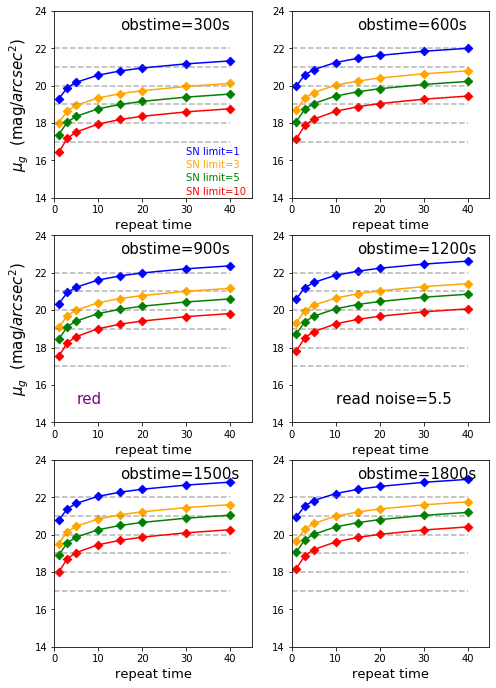

In [49]:
xx=np.array([1,3,5,10,15,20,30,40])
fig, axes = plt.subplots(3,2,figsize=(18*1.3/3,18*1.3/2))
axes = axes.ravel()
s=15
axes[0].text(15,23,'obstime=300s',fontsize=s)
pt(0,xx,sss_22[1].data[0][0],sss_22[1].data[0][1],sss_22[1].data[0][2],sss_22[1].data[0][3])
axes[0].set_ylabel('$\mu_{g}$ '+' (mag/$arcsec^{2}$)',fontsize=s)
axes[0].text(30,14.2,'SN limit=10',color='r',fontsize=s-5)
axes[0].text(30,14.9,'SN limit=5',color='g',fontsize=s-5)
axes[0].text(30,15.6,'SN limit=3',color='orange',fontsize=s-5)
axes[0].text(30,16.3,'SN limit=1',color='b',fontsize=s-5)

axes[1].text(15,23,'obstime=600s',fontsize=s)
pt(1,xx,sss_22[1].data[1][0],sss_22[1].data[1][1],sss_22[1].data[1][2],sss_22[1].data[1][3])

axes[2].text(15,23,'obstime=900s',fontsize=s)
pt(2,xx,sss_22[1].data[2][0],sss_22[1].data[2][1],sss_22[1].data[2][2],sss_22[1].data[2][3])
axes[2].text(5,15,'red',color='purple',fontsize=s)
axes[2].set_ylabel('$\mu_{g}$ '+' (mag/$arcsec^{2}$)',fontsize=s)

axes[3].text(15,23,'obstime=1200s',fontsize=s)
pt(3,xx,sss_22[1].data[3][0],sss_22[1].data[3][1],sss_22[1].data[3][2],sss_22[1].data[3][3])
axes[3].text(10,15,'read noise=5.5',color='k',fontsize=s)

axes[4].text(15,23,'obstime=1500s',fontsize=s)
pt(4,xx,sss_22[1].data[4][0],sss_22[1].data[4][1],sss_22[1].data[4][2],sss_22[1].data[4][3])

axes[5].text(15,23,'obstime=1800s',fontsize=s)
pt(5,xx,sss_22[1].data[5][0],sss_22[1].data[5][1],sss_22[1].data[5][2],sss_22[1].data[5][3])

#axes[5].text(20,15,'read noise=5',color='k',fontsize=20)

In [30]:
sss_25=fits.open('snresult_25.fits')
sss_24=fits.open('snresult_24.fits')
sss_23=fits.open('snresult_23.fits')
sss_225=fits.open('snresult_22.5.fits')

In [31]:
print(sss_25[1].data[0][1][5]-sss_24[1].data[0][1][5])
print(sss_24[1].data[0][1][5]-sss_23[1].data[0][1][5])
print(sss_23[1].data[0][1][5]-sss_225[1].data[0][1][5])


-0.18497177891775252
-0.20763631787153258
-0.1105381249910451


In [4]:
targetmag=17.
galtpl='../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits'
filtera='../obs/filters/sdss_g0.par'

result=input_mag_model(targetmag,galtpl,filtera)
wavearr=result[0]   #A
galflux=result[1]   #10^-12 erg/s/A/cm2   


./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits


In [5]:
delta_lambda=1.755555 # has to be in unit of A

narray=int((10000.0-3500.0)/delta_lambda)  
wavearr=3500.0+delta_lambda*np.float64(np.arange(narray))

In [4]:
len(wavearr)

3702

In [5]:
wavearr

array([3500.      , 3501.755555, 3503.51111 , ..., 9993.797945,
       9995.5535  , 9997.309055])

In [63]:
crab_blue=fits.open('../results/crab_30020_blue.fits')
crab_red=fits.open('../results/crab_30020_red.fits')

In [53]:
crab.info()

Filename: ../results/crab_30020_blue.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  LAMBDA        1 ImageHDU         7   (2050,)   float64   
  2  S/N           1 ImageHDU         7   (2050,)   float64   
  3  TAR_FLUX      1 ImageHDU         7   (2050,)   float64   
  4  TOT_NOISE     1 ImageHDU         7   (2050,)   float64   
  5  SC_NOISE      1 ImageHDU         7   (2050,)   float64   
  6  SYS_NOISE     1 ImageHDU         7   (2050,)   float64   
  7  READNOISE     1 ImageHDU         7   (2050,)   float64   
  8  DARK_NOISE    1 ImageHDU         7   (2050,)   float64   
  9  SKY_NOISE     1 ImageHDU         7   (2050,)   float64   
 10  MOCKGAL       1 ImageHDU         7   (2050,)   float64   


Text(0.5, 0, '$\\lambda$ ($\\AA$)')

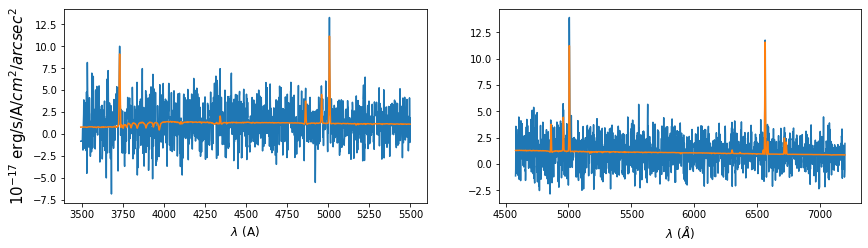

In [82]:
fig=plt.figure(figsize=(20/1.4,5/1.4))
plt.subplot(1,2,1)
plt.plot(crab_blue[1].data,crab_blue[10].data)
plt.plot(crab_blue[1].data,crab_blue[3].data)
plt.ylabel('$10^{-17}$ erg/s/A/$cm^{2}$/$arcsec^{2}$',fontsize=15)
#plt.ylabel('S/N',fontsize=15)
plt.xlabel('$\lambda$ (A)',fontsize=12)

plt.subplot(1,2,2)
plt.plot(crab_red[1].data,crab_red[10].data)
plt.plot(crab_red[1].data,crab_red[3].data)
#plt.ylabel('$10^{-17}$ erg/s/A/$cm^{2}$/$arcsec^{2}$',fontsize=12)
#plt.ylabel('S/N',fontsize=15)
plt.xlabel('$\lambda$ ($\AA$)',fontsize=12)

In [60]:
galtpl=fits.open('../results/wrong/mg_weak_19_30020_red.fits')

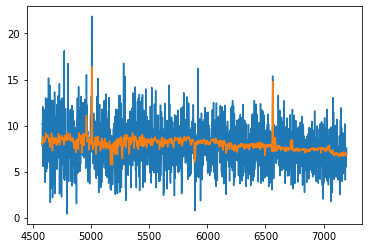

In [61]:
plt.plot(galtpl[1].data['lambda'],galtpl[1].data['mockgal']*10**4)
plt.plot(galtpl[1].data['lambda'],galtpl[1].data['tar_flux']*10**4)


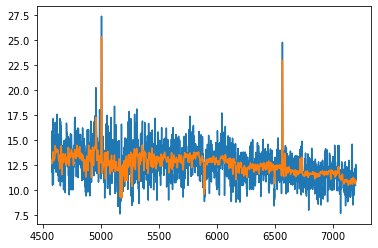

In [62]:
galtpl=fits.open('../results/mg_weak_19_30020_red.fits')
plt.plot(galtpl[1].data,galtpl[10].data)
plt.plot(galtpl[1].data,galtpl[3].data)

In [34]:

targetmag=17.
galtpl='../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew200.fits'
filtera='../obs/filters/sdss_g0.par'

result=inmg.input_mag_model(targetmag,galtpl, filtera)
wavearr=result[0]   #A
galflux=result[1]   #10^-12 erg/s/A/cm2

filename='mg.fits'

if(os.path.exists(filename))==1:
    os.remove(filename)

ss=snpp(wavearr=wavearr,galflux=galflux,
        filename=filename,
        readnoise=5.0,fovp=0.2,npixel_width=2.0,
        obstime=300,repeatnum=20,skyr=22.5,qinput=1.0,
        skyperpixel=True,aa=0.,bb=0.)

resu=ss.fits()
    


./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew200.fits
readnoise: 5.0
npixel_width: 2.0
obstime: 300
repeatnum: 20
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits


In [35]:
resu[:,0]

array([3500.      , 3501.755555, 3503.51111 , ..., 9993.797945,
       9995.5535  , 9997.309055])

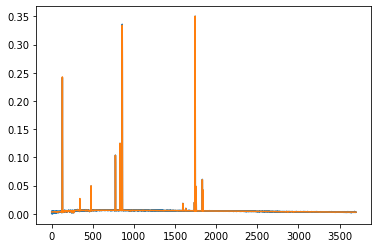

In [36]:
plt.plot(resu[:,9])
plt.plot(resu[:,2])

In [105]:
aa=np.zeros(2*3*4*1).reshape(2,3,4,1)

In [106]:
m=0
for i in [0,1]:
    for j in [0,1,2]:
        for z in [0,1,2,3,7][:4]:
            aa[i,j,z]=11+m
            m=m+1

In [107]:
hun1=fits.PrimaryHDU(header=hdr)
hun2=fits.ImageHDU(aa,name='wave')
hdulist = fits.HDUList([hun1,hun2])
hdulist.writeto('aa.fits')

In [108]:
a=fits.open('aa.fits')

In [109]:
a.info()

Filename: aa.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  WAVE          1 ImageHDU        10   (1, 4, 3, 2)   float64   


In [116]:
a[1].data[1,2,3,0]

34.0

In [125]:
a=np.array([[1,2],[3,4],[5,6]])

In [126]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

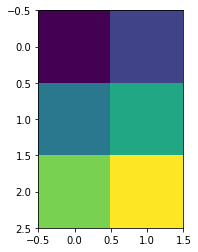

In [127]:
plt.imshow(a)

In [128]:
a[2,1]

6

In [122]:
a[1].data[:,:,2,0]

array([[13., 17., 21.],
       [25., 29., 33.]])

In [64]:
mag=[16.,17.,18.,19.]
typ=['SFgal_texp_FeH0_tau5_Ew10_AGN1.fits','SFgal_texp_FeH0_tau1_Ewd.fits','SFgal_texp_FeH0_tau5_Ew5.fits','SFgal_texp_FeH-2_tau10_Ew50.fits']
tim=[300.,600.,900.,1200.,20.,10.,7.,5.]
rn=[2.5,3.,4.,5.5]

In [65]:
noise=np.zeros(4*4*4*4*narray).reshape(4,4,4,4,narray)
mockdata=np.zeros(4*4*4*4*narray).reshape(4,4,4,4,narray)
fl=np.zeros(4*4*4*4*narray).reshape(4,4,4,4,narray)
for x in range(4): #mag
    for y in range(4): #type
        for i in range(4): #time
            for j in range(4): #readnoise
                
                targetmag=mag[x]
                galtpl='../obs/SFgal_tpl/'+typ[y]
                filtera='../obs/filters/sdss_g0.par'

                result=inmg.input_mag_model(targetmag, galtpl, filtera)
                wavearr=result[0]   #A
                galflux=result[1]   #10^-12 erg/s/A/cm2

                filename='mg.fits'

                if(os.path.exists(filename))==1:
                    os.remove(filename)

                ss=snpp(wavearr=wavearr,galflux=galflux,
                        filename=filename,
                        readnoise=rn[j],fovp=0.2,npixel_width=2.0,
                        obstime=tim[i],repeatnum=tim[i+4],skyr=22.5,qinput=1.0,
                        skyperpixel=True,aa=0.,bb=0.)

                resu=ss.fits() 
                print([x,y,i,j])
                noise[x,y,i,j,:]=resu[:,3]
                fl[x,y,i,j,:]=resu[:,2]
                mockdata[x,y,i,j,:]=resu[:,9]

./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 0, 0, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 0, 0, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 0, 0, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 300.0

output filt: mg.fits
[0, 1, 3, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 2, 0, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 2, 0, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 2, 0, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 5.5
npixel_width: 2.0
obst

./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 3, 3, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 0, 0, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 0, 0, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 300.0
re

output filt: mg.fits
[1, 1, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 1, 3, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 1, 3, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 2, 0, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 3.0
npixel_width: 2.0
obst

output filt: mg.fits
[1, 3, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 3, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 3, 3, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 3, 3, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 2.5
npixel_

output filt: mg.fits
[2, 1, 2, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 1, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 1, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 1, 3, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 5.5
npixel_width: 2.0
obst

output filt: mg.fits
[2, 3, 2, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 900.0
repeatnum: 7.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 3, 2, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 3, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 3, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 4.0
npixel_widt

output filt: mg.fits
[3, 1, 2, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 900.0
repeatnum: 7.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 1, 2, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 1, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 1, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 4.0
npixel_width: 2.0
obsti

output filt: mg.fits
[3, 3, 2, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 900.0
repeatnum: 7.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 3, 2, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 900.0
repeatnum: 7.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 3, 2, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 3, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 3.0
npixel_width

In [35]:
noise.shape

(4, 4, 4, 4, 3702)

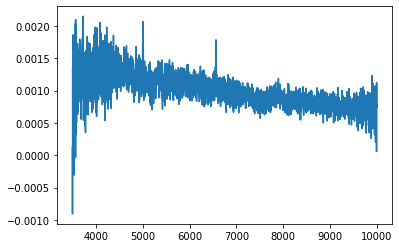

In [38]:
plt.plot(wavearr,mockdata[3,2,2,0])

In [87]:
resu[:,0]

array([3500.      , 3501.755555, 3503.51111 , ..., 9993.797945,
       9995.5535  , 9997.309055])

In [27]:
hdr=fits.Header()
hdr['D01']=('[16,17,18,19]', 'data in dimension 1 in unit of magnitude/arcsec^2')
#hdr['P01']='magnitude', 'parameter in dimension 1'
hdr['D02']=('[AGN, elliptical , weak emission , strong emission]', 'data in dimension 2')
hdr['P02']=('type of spectrum', 'parameter in dimension 2')
hdr['D03']=('[300s*20, 600s*10, 900s*7, 1200s*5]','data in dimension 3')
hdr['P03']=('exposure time (s)*repeat time', 'parameter in dimension 3')
hdr['D04']=('[2.5, 3, 4, 5.5]', 'data in dimension 4')
hdr['P04']=('readnoise (e/pixel)','parameter in dimension 4')
hdr['wave']='Angstrom'
hdr['mockgal']='1e-13 erg/s/cm2/A'

In [28]:
hdr

D01     = '[16,17,18,19]'      / data in dimension 1 in unit of magnitude/arcsec
D02     = '[AGN, elliptical , weak emission , strong emission]' / data in dimens
P02     = 'type of spectrum'   / parameter in dimension 2                       
D03     = '[300s*20, 600s*10, 900s*7, 1200s*5]' / data in dimension 3           
P03     = 'exposure time (s)*repeat time' / parameter in dimension 3            
D04     = '[2.5, 3, 4, 5.5]'   / data in dimension 4                            
P04     = 'readnoise (e/pixel)' / parameter in dimension 4                      
WAVE    = 'Angstrom'                                                            
MOCKGAL = '1e-13 erg/s/cm2/A'                                                   

In [66]:
hun1=fits.PrimaryHDU(header=hdr)
hun2=fits.ImageHDU(wavearr,name='wave')
hun3=fits.ImageHDU(noise,name='tot_noise')
hun4=fits.ImageHDU(mockdata,name='mockgal')
hun5=fits.ImageHDU(fl)
hdulist = fits.HDUList([hun1,hun2,hun3,hun4,hun5])
hdulist.writeto('simulatio.fits')

In [68]:
hun1=fits.PrimaryHDU(header=hdr)
hun2=fits.ImageHDU(wavearr,name='wave')
hun3=fits.ImageHDU(noise,name='tot_noise')
hun4=fits.ImageHDU(mockdata,name='mockgal')
#hun5=fits.ImageHDU(fl)
hdulist = fits.HDUList([hun1,hun2,hun3,hun4])
hdulist.writeto('simulation.fits')

In [71]:
su=fits.open('simulation.fits')

In [72]:
su.info()

Filename: simulation.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  WAVE          1 ImageHDU         7   (3702,)   float64   
  2  TOT_NOISE     1 ImageHDU        11   (3702, 4, 4, 4, 4)   float64   
  3  MOCKGAL       1 ImageHDU        11   (3702, 4, 4, 4, 4)   float64   


In [73]:
su[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
D01     = '[16,17,18,19]'      / data in dimension 1 in unit of magnitude/arcsec
D02     = '[AGN, elliptical , weak emission , strong emission]' / data in dimens
P02     = 'type of spectrum'   / parameter in dimension 2                       
D03     = '[300s*20, 600s*10, 900s*7, 1200s*5]' / data in dimension 3           
P03     = 'exposure time (s)*repeat time' / parameter in dimension 3            
D04     = '[2.5, 3, 4, 5.5]'   / data in dimension 4                            
P04     = 'readnoise (e/pixel)' / parameter in dimension 4                      
WAVE    = 'Angstrom'                                                            
MOCKGAL = '1e-13 erg/s/cm2/A

In [74]:
su[2].data.shape

(4, 4, 4, 4, 3702)

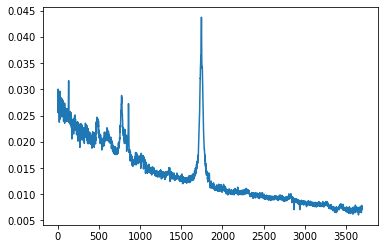

In [75]:
plt.plot(su[3].data[0,0,0,0])

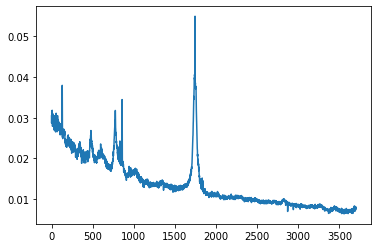

In [14]:
plt.plot(mockdata[0,0,0,0])

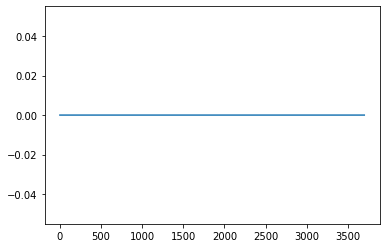

In [25]:
plt.plot((su[3].data[0,0,0,0]-mockdata[0,0,0,0])/mockdata[0,0,0,0])

# read template

In [61]:
aaa=fits.open('../obs/tpl/SFgal_texp_FeH0_tau1_Ewd.fits')

In [62]:
aaa[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 5565 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'E       '                                                            
TUNIT1  = 'angstrom'                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'E       '        

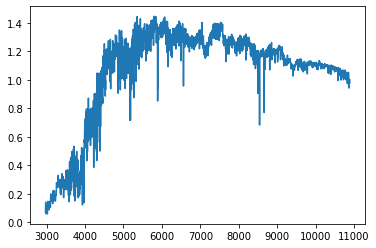

In [63]:
plt.plot(aaa[1].data['wavelength'],aaa[1].data['flux'])

In [64]:
aaa[1].data['wavelength']

array([ 2970.4775,  2971.1711,  2971.865 , ..., 10885.386 , 10887.928 ,
       10890.471 ], dtype=float32)

# test

In [53]:
targetmag=17.
#galtpl='../obs/tpl/GalModel-ES0.fits'
filtera='../obs/filters/sdss_g0.par'
galtpl='../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits'

In [55]:
#####################################################################################
#filter
resulte=read_filter.filteraa(filtera)
wavefilter=resulte[0]
fluxfilter=resulte[1]
vmin=resulte[2]
vmax=resulte[3]
filtereff=resulte[4]

####################################################################################
# define wavelength array,
#cover the range of 350nm to 1050nm, depend on the spectral resolution wanted. 

delta_lambda=1.755555 # has to be in unit of A
print('delta_lambda:', delta_lambda)

narray=int((10000.0-3500.0)/delta_lambda) 
wavearr=3500.0+delta_lambda*np.float64(np.arange(narray))
# select out the array of V band filter
ii=np.logical_and(wavearr >= vmin, wavearr <= vmax)
wavetmp2=wavearr[ii]
x=np.interp(wavetmp2,wavefilter,fluxfilter)
integratef4=x*wavetmp2
integconst=simps(integratef4,wavetmp2) # int(lambda*Rlambda*dlambda)

lambdav=filtereff #A
###############################################################
# define basic target brightness, parameters constantly change
itarget=targetmag    # in Johnson V mag/arcsec^2 unit
print('itarget:',itarget)

itarget_jy=3631.0*10**(-itarget/2.5+3.0)  # target flux in V in mJy/arcsec^2 unit
itarget_nm=itarget_jy*3.0/(lambdav/100.0)**2 #target flux in V in 10^(-12)erg/s/cm^2/A (/arcsec^2 ?)

galtpl=galtpl
tplfile=galtpl
print('tplfile:',tplfile)   

sfgal=fits.open(tplfile)
wavegal=sfgal[1].data['wave'] # A
galflux2=sfgal[1].data['flux']
galflux1=np.interp(wavearr,wavegal,galflux2)

#;normalize the galaxy spectrum to the V band magnitude specified.
ii=np.logical_and(wavegal >= vmin, wavegal <= vmax)
wavetmp=wavegal[ii]
fluxtmp=galflux2[ii]
x=np.interp(wavetmp,wavefilter,fluxfilter)
vfluxtmp=x*wavetmp*fluxtmp #bandpass*lambda*F_gal_lambda
galintegrate=simps(vfluxtmp,wavetmp)
galnorm=itarget_nm*integconst/galintegrate
galflux=galnorm*galflux1   # the unit should now be in 10^(-12)erg/s/A/cm^2 (/arcsec^2 ?)


./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits


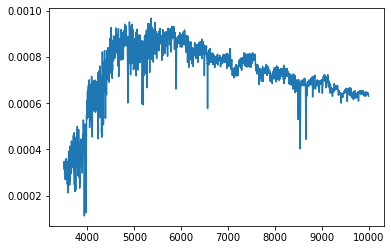

In [51]:
plt.plot(wavearr,galflux)

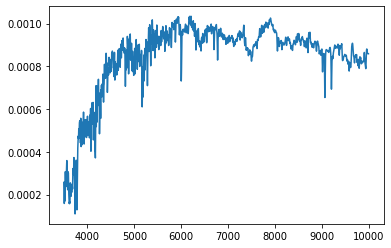

In [56]:
plt.plot(wavearr,galflux)